In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("traffic-sign-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-sign-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-sign-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train,y_train=train['features'],train['labels']
x_validation,y_validation=valid['features'],valid['labels']
x_test,y_test=test['features'],test['labels']

In [4]:
x_train.shape


(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

13

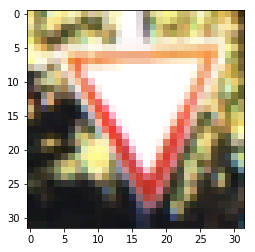

In [6]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

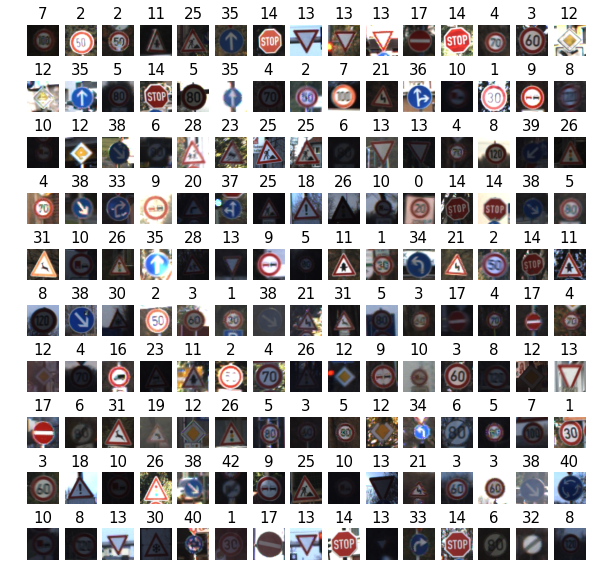

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
    
    # Select a random number
    
    # read and display an image with the selected index    
    

        

In [8]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [9]:
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)
x_validation_gray=np.sum(x_validation/3,axis=3,keepdims=True)

In [10]:
x_train_gray.shape

(34799, 32, 32, 1)

In [11]:
x_train_gray_norm=(x_train_gray-128)/128
x_test_gray_norm=(x_test_gray-128)/128
x_validation_gray_norm=(x_validation_gray-128)/128

In [12]:
x_train_gray_norm

array([[[[-0.60677083],
         [-0.63020833],
         [-0.640625  ],
         ...,
         [-0.59114583],
         [-0.578125  ],
         [-0.59895833]],

        [[-0.64322917],
         [-0.6484375 ],
         [-0.63802083],
         ...,
         [-0.59635417],
         [-0.59895833],
         [-0.609375  ]],

        [[-0.6640625 ],
         [-0.66666667],
         [-0.65104167],
         ...,
         [-0.60416667],
         [-0.60677083],
         [-0.6171875 ]],

        ...,

        [[-0.78125   ],
         [-0.7890625 ],
         [-0.70572917],
         ...,
         [-0.73177083],
         [-0.72395833],
         [-0.73177083]],

        [[-0.78385417],
         [-0.79166667],
         [-0.72916667],
         ...,
         [-0.74739583],
         [-0.73958333],
         [-0.74479167]],

        [[-0.8046875 ],
         [-0.80729167],
         [-0.76822917],
         ...,
         [-0.734375  ],
         [-0.74739583],
         [-0.75520833]]],


       [[[-0.25520833],


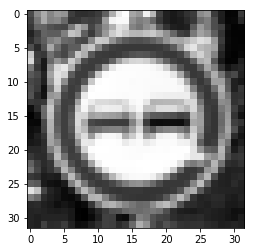

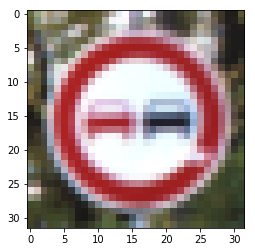

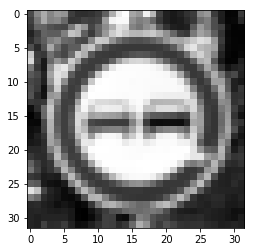

In [13]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

In [14]:
from tensorflow.keras import datasets, layers, models
CNN=models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1176)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               141240    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_2 (Dense)              (None, 43)                3655      
Total params: 155,215
Trainable params: 155,215
Non-trainable params: 0
_________________________________________________________________


In [15]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=CNN.fit(x_train_gray_norm,
                y_train,batch_size=500,
                epochs=50,verbose=1,
                validation_data=(x_validation_gray_norm,y_validation))


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 15s 432us/step - loss: 2.9166 - acc: 0.2441 - val_loss: 2.6000 - val_acc: 0.3211
Epoch 2/50
34799/34799 [==============================] - 15s 426us/step - loss: 1.6780 - acc: 0.5392 - val_loss: 1.7925 - val_acc: 0.4959
Epoch 3/50
34799/34799 [==============================] - 15s 420us/step - loss: 1.0970 - acc: 0.6955 - val_loss: 1.4036 - val_acc: 0.6100
Epoch 4/50
34799/34799 [==============================] - 15s 421us/step - loss: 0.8180 - acc: 0.7776 - val_loss: 1.1443 - val_acc: 0.6642
Epoch 5/50
34799/34799 [==============================] - 15s 421us/step - loss: 0.6409 - acc: 0.8272 - val_loss: 1.0745 - val_acc: 0.7077
Epoch 6/50
34799/34799 [==============================] - 15s 421us/step - loss: 0.5498 - acc: 0.8509 - val_loss: 0.9492 - val_acc: 0.7458
Epoch 7/50
34799/34799 [==============================] - 15s 421us/step - loss: 0.4560 - acc: 0.8812 - val_loss: 0.9

In [17]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 4s 280us/step
Test Accuracy: 0.848931116427303


In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

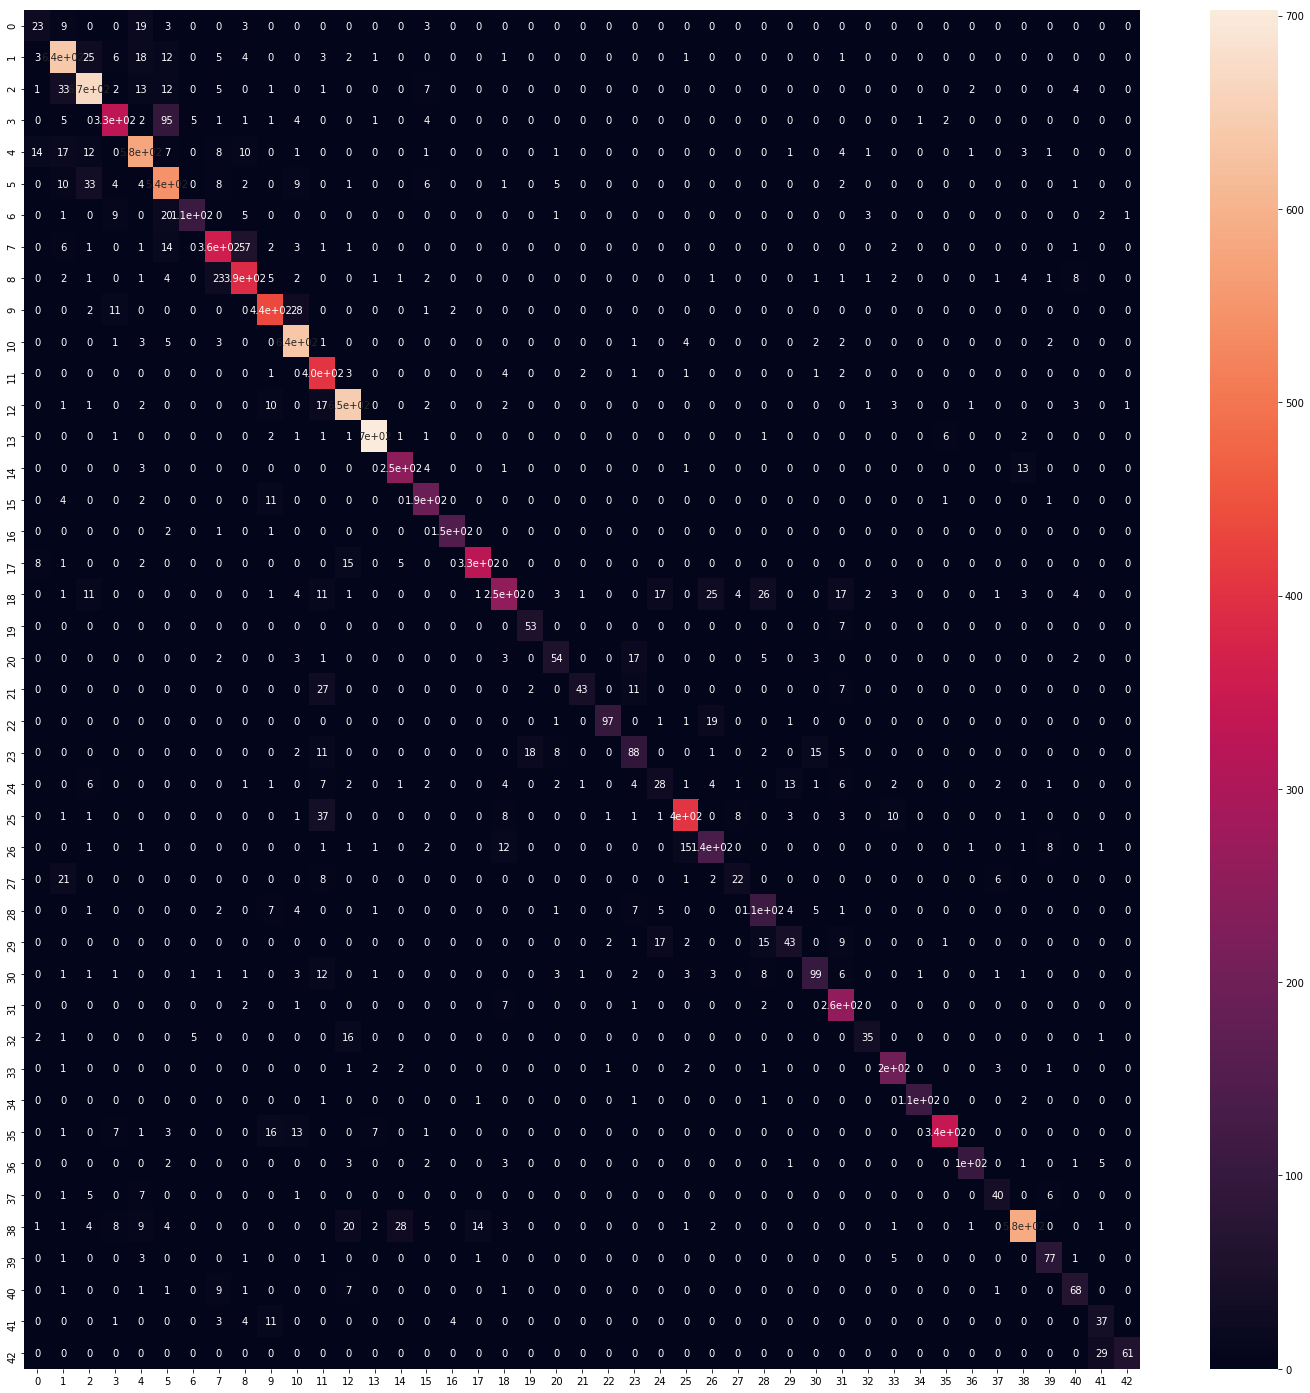

In [20]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

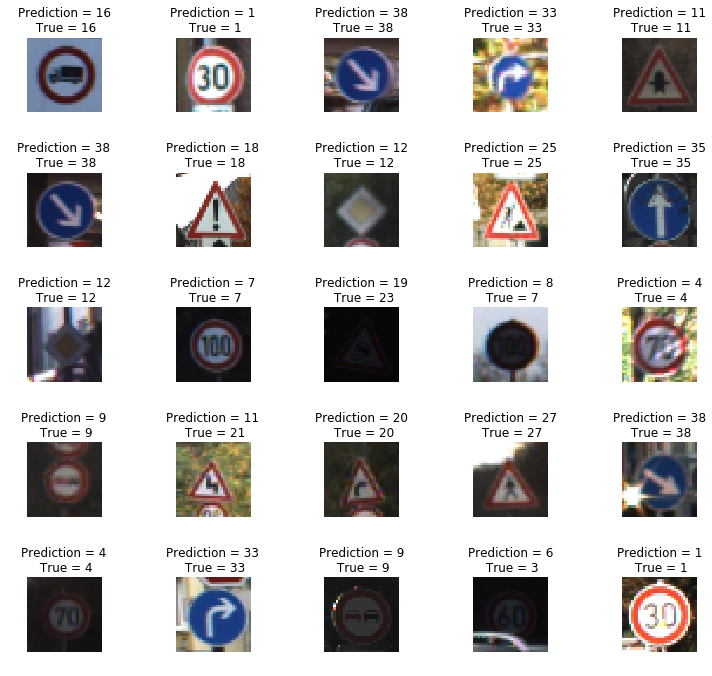

In [21]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    